In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re
from difflib import SequenceMatcher

In [2]:
y_june = (
    pd.read_csv('DATA/youtubejune2022.csv')
    .assign(Month='June')
    .rename(columns={
        "channel name": "username",
        "youTuber":"name",
        "Category": "category1",
        "Category_2": "category2",
        "Subscribers count": "subs",
        "Country": "country",
        "Views avg.": "views",
        "Likes avg": "likes",
        "Comments avg.": "comments",
        "Month": "month"
    })
    .dropna()
)
y_june.head(1)

,username,name,category1,category2,subs,country,views,likes,comments,month
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',June


In [3]:
y_sep = (
    pd.read_csv('DATA/Youtubesep2022.csv')
    .assign(Month='September')
    .rename(columns={
        "Name": "username",
        "Youtuber":"name",
        "Category_2": "category2",
        " Subscribers": "subs",
        "Country": "country",
        "Avg. views\r\n": "views",
        "Avg. likes": "likes",
        "Avg Comments": "comments",
        "Category_3": "category3",
        "Month": "month"
    })
    .drop("S.no", axis=1)
    .dropna()
)
y_sep.head(1)

,username,name,country,subs,category2,views,likes,comments,category3,month
3,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,September


In [4]:
y_nov = (
    pd.read_csv('DATA/youtubenov2022.csv')
    .assign(Month='November')
    .rename(columns={
        "Youtube channel": "username",
        "youtuber name":"name",
        "Category": "category1",
        "Followers": "subs",
        "Country": "country",
        "\nViews (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Category-2": "category2",
        "Month": "month"
    })
    .drop("s.no", axis=1)
    .dropna()
)
y_nov.head(1)

,username,name,category1,subs,country,views,likes,comments,category2,month
3,MrBeast6000,MrBeast,Video games,109.1M,United States,38.4M,3.1M,56.7K,Humor,November


In [5]:
y_dec= pd.read_csv('DATA/YOUTUBEDEC2022.csv')
y_dec = (
    pd.read_csv('DATA/YOUTUBEDEC2022.csv')
    .assign(Month='December')
    .rename(columns={
        "Youtube channel": "username",
        "youtuber name":"name",
        "Category": "category1",
        "Followers": "subs",
        "Country": "country",
        "\nViews (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Category-2": "category2",
        "Month": "month"
    })
    .drop("s.no", axis=1)
    .dropna()
)
y_dec.head(1)

,username,name,category1,subs,country,views,likes,comments,category2,month
3,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor,December


In [6]:
numeric_text_cols = ['subs', 'views', 'likes', 'comments']

def delete_rows_with_value(df, value):
    rows_with_value = df[df.eq(value).any(axis=1)].index
    updated_df = df.drop(rows_with_value)
    return updated_df

y_june = delete_rows_with_value(y_june, "N/A'")
y_june.head(1)

,username,name,category1,category2,subs,country,views,likes,comments,month
14,Трум Трум,Трум Трум,Humor,Toys,13.7M,-,103.2K,1.8K,83,June


In [8]:
def cientific_int(column: pd.Series) -> pd.Series:
    return (
        column
        .fillna('0')
        .replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True)
        .map(pd.eval)
        .astype(int)
        .replace(0, np.nan)
    )

y_june = y_june.dropna()
y_june.loc[:, numeric_text_cols] = y_june[numeric_text_cols].apply(cientific_int)
y_sep.loc[:, numeric_text_cols] = y_sep[numeric_text_cols].apply(cientific_int)
y_nov.loc[:, numeric_text_cols] = y_nov[numeric_text_cols].apply(cientific_int)
y_dec.loc[:, numeric_text_cols] = y_dec[numeric_text_cols].apply(cientific_int)

In [9]:
y_months = (
    pd.concat([y_june, y_sep, y_nov, y_dec], ignore_index=True)
    .drop_duplicates()
)

y_months.head(3)

,username,name,category1,category2,subs,country,views,likes,comments,month,category3
0,Трум Трум,Трум Трум,Humor,Toys,13700000,-,103200,1800,83,June,NaN
1,dangmattsmith,Dang Matt Smith,Animation,Humor,13700000,-,103500,4400,332,June,NaN
2,FrontaL Gaming,FrontaL Gaming,Movies,Animation,11700000,-,253700,19000,1300,June,NaN


# Análisis

In [10]:
y_means = (
    y_months
    .groupby('username')
     # aggregate functiosn skips nan by deffault
    .aggregate({
        'subs': 'mean',
        'views': 'mean',
        'likes': 'mean',
        'comments': 'mean'
    })    
    .reset_index()
    .sort_values('subs', ascending=False)
)

In [11]:
y_means

,username,subs,views,likes,comments
175,MrBeast,110550000.0,5.665000e+07,2.550000e+06,85400.000000
177,MrBeast6000,103200000.0,5.365000e+07,3.500000e+06,109150.000000
359,sabtv,72100000.0,4.190000e+04,7.243333e+02,18.000000
250,Sony SAB,71700000.0,6.170000e+04,9.240000e+02,18.000000
347,movieclips,57800000.0,2.056667e+04,2.926667e+02,16.333333
...,...,...,...,...,...
40,CRACKS,9400000.0,2.270000e+04,1.600000e+03,97.000000
138,LetDa Hyper,9400000.0,1.424000e+05,7.400000e+03,510.000000
285,Troom Troom SELECT,9300000.0,2.548000e+05,2.900000e+03,52.000000
278,Thơ Nguyễn,9300000.0,1.855000e+05,2.400000e+03,106.000000


### Métricas de valor

In [12]:
y_means['views_ratio'] = y_means.views / y_means.subs
y_means['likes_ratio'] = y_means.likes / y_means.subs
y_means['comments_ratio'] = y_means.comments / y_means.subs

In [13]:
y_means

,username,subs,views,likes,comments,views_ratio,likes_ratio,comments_ratio
175,MrBeast,110550000.0,5.665000e+07,2.550000e+06,85400.000000,0.512438,0.023066,7.725011e-04
177,MrBeast6000,103200000.0,5.365000e+07,3.500000e+06,109150.000000,0.519864,0.033915,1.057655e-03
359,sabtv,72100000.0,4.190000e+04,7.243333e+02,18.000000,0.000581,0.000010,2.496533e-07
250,Sony SAB,71700000.0,6.170000e+04,9.240000e+02,18.000000,0.000861,0.000013,2.510460e-07
347,movieclips,57800000.0,2.056667e+04,2.926667e+02,16.333333,0.000356,0.000005,2.825836e-07
...,...,...,...,...,...,...,...,...
40,CRACKS,9400000.0,2.270000e+04,1.600000e+03,97.000000,0.002415,0.000170,1.031915e-05
138,LetDa Hyper,9400000.0,1.424000e+05,7.400000e+03,510.000000,0.015149,0.000787,5.425532e-05
285,Troom Troom SELECT,9300000.0,2.548000e+05,2.900000e+03,52.000000,0.027398,0.000312,5.591398e-06
278,Thơ Nguyễn,9300000.0,1.855000e+05,2.400000e+03,106.000000,0.019946,0.000258,1.139785e-05


### Gráficas

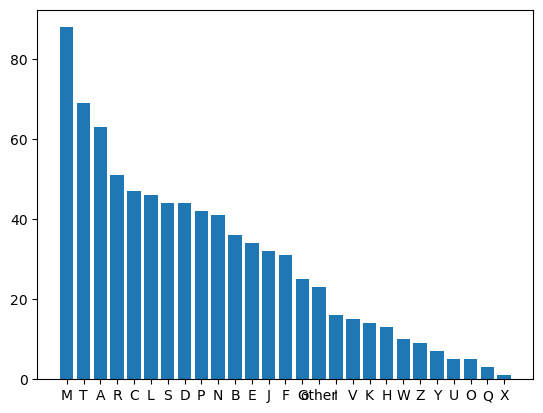

In [15]:
def get_inicial(name: str) -> str:
    name = str(name)
    first_is_letter = re.search(r'^[a-zA-Z]', name)
    if first_is_letter:
        return name[0].upper()
    else:
        return 'other'

initials = (
    y_months.name
    .map(get_inicial)
    .value_counts()
    .reset_index(name='frequency')
    .rename(columns={
        'index': 'letter',
        'name': 'letter'
    })
)
plt.bar(initials.letter, initials.frequency)
plt.show()

In [16]:
name_len = (
    y_months[['name', 'username']]
    .assign(len_name = y_months.name.map(lambda x: len(str(x))))
    .assign(len_username = y_months.username.map(lambda x: len(str(x))))
)
ids1 = name_len.loc[name_len.len_name.idxmax()]
ids2 = name_len.loc[name_len.len_username.idxmax()]

In [17]:
ids1

name            DaniRep | +6 Vídeos Diarios De GTA 5 Online!
username                                          TheDaniRep
len_name                                                  44
len_username                                              10
Name: 77, dtype: object

In [18]:
ids2

name                                              TheDaniRep
username        DaniRep | +6 Vídeos Diarios De GTA 5 Online!
len_name                                                  10
len_username                                              44
Name: 322, dtype: object